In [2]:
import quadshit as qs
reload(qs)
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
%matplotlib inline

In [3]:
D=qs.QuadShit()

In [4]:
L=D.getLmatrix(1)

In [5]:
v=np.cos(np.arange(1024)*2*np.pi/1024)
print D.r2rfft(v)[:10]
np.dot(L,v)[:10]


[ -1.76038154e-15  -1.70780482e-14   3.20000000e+01   7.19827399e-17
   7.95223296e-16   2.41960571e-17  -3.80946622e-15  -9.09244737e-17
   1.60266557e-16  -7.66853684e-17]


ValueError: shapes (512,512) and (1024,) not aligned: 512 (dim 1) != 1024 (dim 0)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

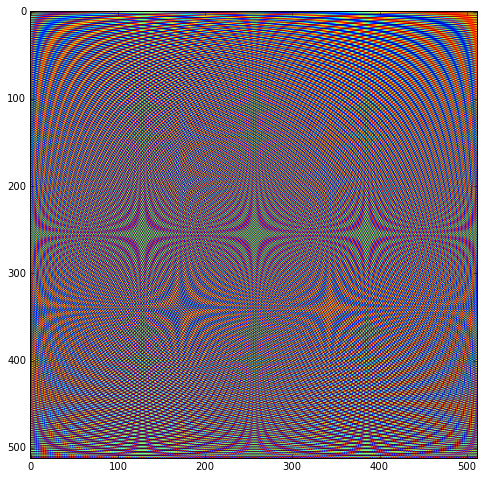

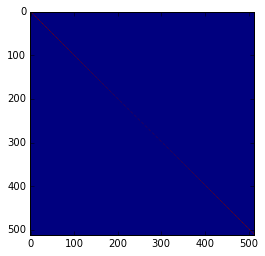

In [6]:
plt.figure(figsize=(8,8))
plt.imshow(L)
Id=np.dot(L,L.T)
print Id.diagonal()
print Id.sum(),Id.diagonal().sum()
plt.figure()
plt.imshow(Id)

Creating Sp
Creating Sp


quadshit.py:50: RuntimeWarning: invalid value encountered in divide
  xip=(np.sin(kup*2*np.pi*np.arange(N)/N)-np.sin(kdown*2*np.pi*np.arange(N)/N))/(2*np.pi*np.arange(N)/N)


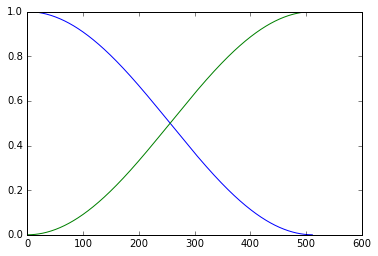

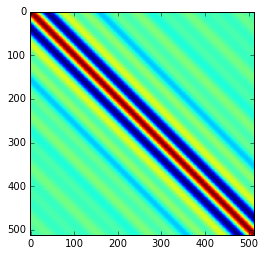

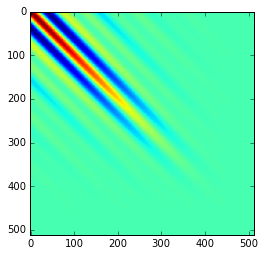

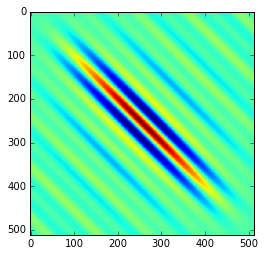

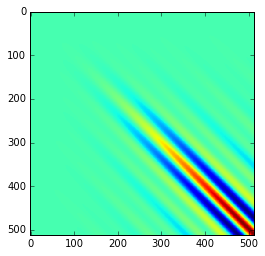

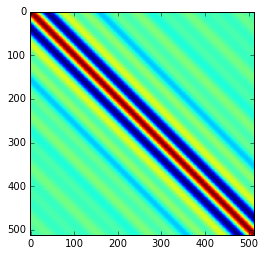

In [7]:
reload(qs)
D=qs.QuadShit(A2=2.0)
# derivs
Sp,xil,wl,wh=D.getSp3Alt()
plt.plot(wl)
plt.plot(wh)
Sp1,xil=D.getSponez()
for S in [Sp1[2], Sp[2], Sp[7],Sp[12],Sp[2]+Sp[7]+Sp[12]]:
    plt.figure()
    plt.imshow(S,interpolation='nearest')


In [8]:
LSL=[np.dot(np.dot(L,S),L.T) for S in Sp]

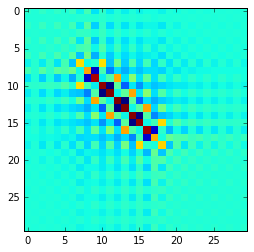

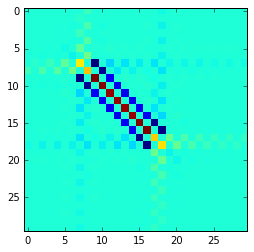

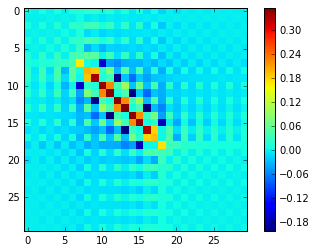

In [9]:
plt.figure()
plt.imshow(LSL[2][:30,:30],interpolation='nearest')
plt.figure()
plt.imshow(LSL[7][:30,:30],interpolation='nearest')
plt.figure()
plt.imshow(LSL[12][:30,:30],interpolation='nearest')

plt.colorbar()

In [10]:
cid=D.CI*D.genskew_masked()
lcid=np.dot(L,cid)

In [11]:
FDT=0.5*np.array([np.dot(np.dot(S,cid),cid) for S in Sp])
print FDT

[  0.3150346    2.05239121   0.93393015   2.69902059  57.43409902
  -0.11764454   0.75415401   0.39789739   0.68842866  26.24027385
   0.22747316   0.49797139   0.3186773    0.41063015  26.71251389]


In [12]:
FDL=0.5*np.array([np.dot(np.dot(SL,lcid),lcid) for SL in LSL])
print FDL/FDT

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [17]:
## let's keep just N biggest elements
    
D=qs.QuadShit(N=5*3*32)
cid=D.CI*D.genskew_masked()   
Sp,xil,wl,wh=D.getSp3Alt()
# true, classical OQE FD and SD

N=D.N
Nb=D.Nb*3
TFD=0.5*np.array([np.dot(np.dot(S,cid),cid) for S in Sp])
TSD=np.zeros((Nb,Nb))
CI=np.diag(D.CI)
for i in range(len(TFD)):
    for j in range(i,len(TFD)):
        TSD[i,j]=0.5*np.trace(np.dot(np.dot(CI,Sp[i]),np.dot(CI,Sp[j])))        
        TSD[j,i]=TSD[i,j]
TV=np.dot(la.inv(TSD),TFD)
#plt.figure()
#plt.imshow(TSD/np.outer(TSD.diagonal(),TSD.diagonal()))

for Nl in [1,2,3,4,5]:
    L=D.getLmatrix(Nl)
    lcid=np.dot(L,cid)
    LSL=[np.dot(np.dot(L,S),L.T) for S in Sp]
    for fnbig in [-1,0.1,0.01,0.001]:
        nbig=int(fnbig*N*N)
        nLSL=[]
        for M in LSL:
            Mc=M*1.0
            if (nbig>0):
                v=abs(Mc.flatten())
                v.sort()
                cut=v[-nbig]
                Mc[np.where(abs(Mc)<cut)]=.0
            #plt.figure()
            #plt.imshow(log(abs(M)),interpolation='nearest')
            nLSL.append(Mc)
        FDL=0.5*np.array([np.dot(np.dot(SL,lcid),lcid) for SL in nLSL])
        SDL=np.zeros((Nb,Nb))
        LCI=np.dot(np.dot(L,np.diag(D.CI)),L.T)
        for i in range(len(FDL)):
            for j in range(i,len(FDL)):
                SDL[i,j]=0.5*np.trace(np.dot(np.dot(LCI,nLSL[i]),np.dot(LCI,nLSL[j])))        
                SDL[j,i]=SDL[i,j]
        SDL[4,:]=TSD[4,:]
        SDL[:,4]=TSD[:,4]
        SDL[9,:]=TSD[9,:]
        SDL[:,9]=TSD[:,9]
        SDL[14,:]=TSD[14,:]
        SDL[:,14]=TSD[:,14]

        VL=np.dot(la.inv(SDL),FDL)
        print "----------------------"
        print "Nfft=",Nl,"elements used:",fnbig
        print "ratios FD:",FDL/TFD-1
        print "rations SD diag:",SDL.diagonal()/TSD.diagonal()-1
        print "ratios values:",VL/TV-1
        #plt.figure()
        #plt.imshow(SDL/np.outer(SDL.diagonal(),SDL.diagonal()))


Creating Sp
----------------------
Nfft= 1 elements used: -1
ratios FD: [ -4.44089210e-16  -6.66133815e-16  -5.55111512e-16   1.11022302e-15
   2.22044605e-16   4.21884749e-15  -2.22044605e-15  -1.55431223e-15
   0.00000000e+00   2.22044605e-16  -5.21804822e-15  -5.55111512e-16
  -6.66133815e-16   4.44089210e-16   4.44089210e-16]
rations SD diag: [ -3.88578059e-15  -8.88178420e-16   8.88178420e-16  -8.88178420e-16
   0.00000000e+00  -5.55111512e-15  -2.33146835e-15  -6.66133815e-16
  -1.33226763e-15   0.00000000e+00  -2.66453526e-15  -1.22124533e-15
   0.00000000e+00  -4.44089210e-16   0.00000000e+00]
ratios values: [ -4.10782519e-15   1.11022302e-15  -8.88178420e-16   2.22044605e-15
   6.66133815e-16   2.19824159e-14   6.66133815e-16  -1.77635684e-15
   8.59312621e-14   2.22044605e-16  -2.38697950e-14  -1.22124533e-15
  -7.77156117e-16   2.22044605e-15   4.44089210e-16]
----------------------
Nfft= 1 elements used: 0.1
ratios FD: [ -2.73667880e-03  -2.65176676e-03  -2.77160394e-03  -7